FRAUD DETECTION


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [4]:

train_data = pd.read_csv('ftrainn.csv')

test_data = pd.read_csv('ftest.csv')

In [5]:
print("Train Data Info:")
print(train_data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1009 non-null   int64  
 1   trans_date_trans_time  1009 non-null   object 
 2   cc_num                 1009 non-null   float64
 3   merchant               1009 non-null   object 
 4   category               1009 non-null   object 
 5   amt                    1009 non-null   float64
 6   first                  1009 non-null   object 
 7   last                   1009 non-null   object 
 8   gender                 1009 non-null   object 
 9   street                 1009 non-null   object 
 10  city                   1009 non-null   object 
 11  state                  1009 non-null   object 
 12  zip                    1009 non-null   int64  
 13  lat                    1009 non-null   float64
 14  long                   1009 non-null   

In [6]:
print("\nSummary Statistics:")
print(train_data.describe())



Summary Statistics:
        Unnamed: 0        cc_num          amt           zip          lat  \
count  1009.000000  1.009000e+03  1009.000000   1009.000000  1009.000000   
mean    504.000000  4.176072e+17    78.048910  49302.017839    38.598539   
std     291.417513  1.306017e+18   112.700384  27113.872630     4.960604   
min       0.000000  6.042310e+10     1.030000   1330.000000    20.027100   
25%     252.000000  1.800360e+14    19.120000  25106.000000    35.256300   
50%     504.000000  3.514870e+15    58.910000  48438.000000    39.412500   
75%     756.000000  4.658490e+15    92.990000  72042.000000    41.698300   
max    1008.000000  4.992350e+18  1636.870000  99783.000000    64.755600   

              long      city_pop     unix_time    merch_lat   merch_long  \
count  1009.000000  1.009000e+03  1.009000e+03  1009.000000  1009.000000   
mean    -90.664634  8.096243e+04  1.325399e+09    38.603689   -90.656401   
std      14.478343  2.547760e+05  1.342299e+04     4.993267    14.

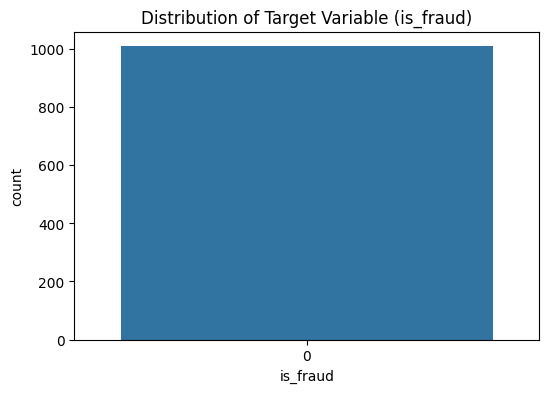

<Figure size 1200x800 with 0 Axes>

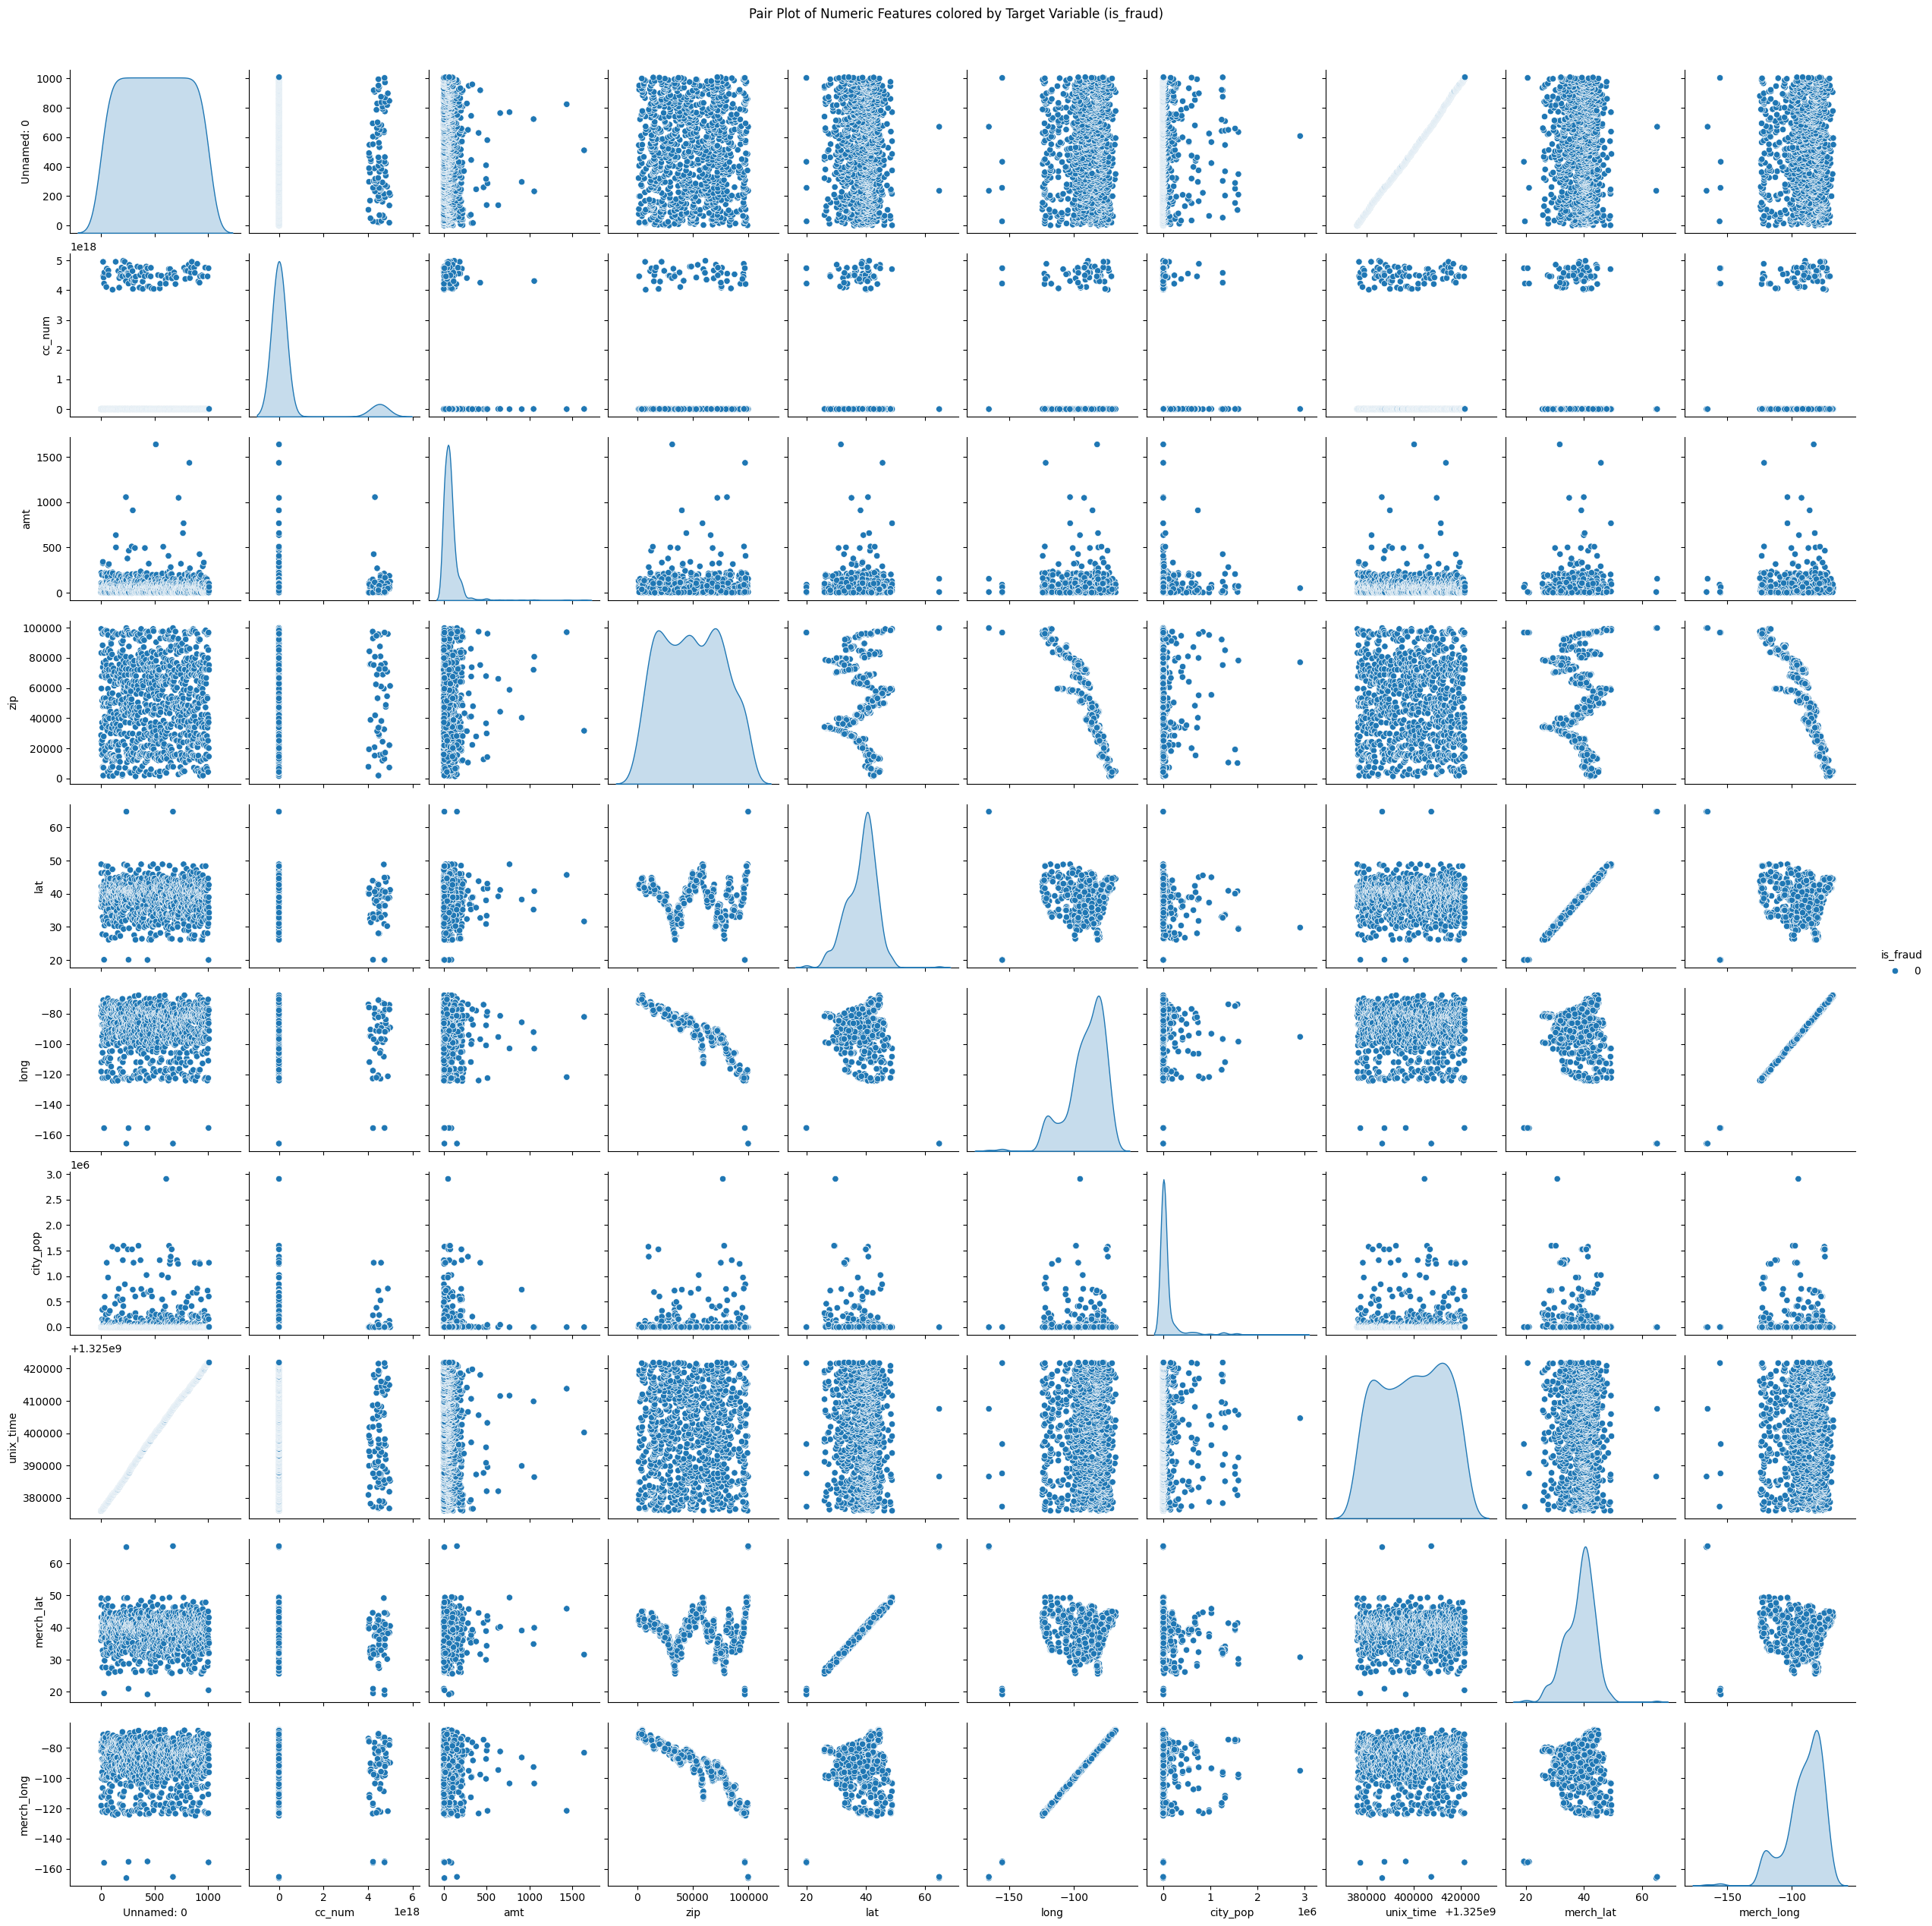

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Target Variable (is_fraud)')
plt.show()

plt.figure(figsize=(12, 8))
sns.pairplot(train_data, hue='is_fraud', diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Features colored by Target Variable (is_fraud)', y=1.02)
plt.show()

In [12]:
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']

X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

In [13]:
numeric_features = X_train.select_dtypes(include=['float64']).columns
numeric_transformer = StandardScaler()

categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_cols)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['cc_num', 'amt', 'lat', 'long', 'merch_lat', 'merch_long'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['merchant', 'category',
                                                   'gender', 'job'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [14]:
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[546]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       546

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546

